# MLR Model on sampling-2 Dataset with Cross Validation

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("CheXPre.csv", sep = ';')

In [3]:
df.tail()

,TOA,Oil,MIBK,Temperature,Percentage,Aycicek,Misir,Keten,Badem,Susam,Hint,Citric,Glycolic,Malic
349,1.5,1.5,0.0,0.4,0.8512,0,1,0,0,0,0,0,0,1
350,1.5,1.5,0.0,0.4,0.8542,0,0,1,0,0,0,0,0,1
351,1.5,1.5,0.0,0.4,0.8945,0,0,0,1,0,0,0,0,1
352,1.5,1.5,0.0,0.4,0.8587,0,0,0,0,1,0,0,0,1
353,1.5,1.5,0.0,0.4,0.9274,0,0,0,0,0,1,0,0,1


### Information about Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TOA          354 non-null    float64
 1   Oil          354 non-null    float64
 2   MIBK         354 non-null    float64
 3   Temperature  354 non-null    float64
 4   Percentage   354 non-null    float64
 5   Aycicek      354 non-null    int64  
 6   Misir        354 non-null    int64  
 7   Keten        354 non-null    int64  
 8   Badem        354 non-null    int64  
 9   Susam        354 non-null    int64  
 10  Hint         354 non-null    int64  
 11  Citric       354 non-null    int64  
 12  Glycolic     354 non-null    int64  
 13  Malic        354 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 38.8 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TOA,354.0,0.868644,0.531293,0.0000,0.5000,0.7500,1.50000,1.7500
Oil,354.0,1.271186,1.048783,0.0000,0.0000,1.5000,2.25000,3.0000
MIBK,354.0,0.081356,0.192912,0.0000,0.0000,0.0000,0.00000,0.7000
Temperature,354.0,0.257627,0.033000,0.2500,0.2500,0.2500,0.25000,0.4000
Percentage,354.0,0.565076,0.300484,0.0014,0.3472,0.6146,0.79495,0.9858
Aycicek,354.0,0.163842,0.370656,0.0000,0.0000,0.0000,0.00000,1.0000
Misir,354.0,0.166667,0.373205,0.0000,0.0000,0.0000,0.00000,1.0000
Keten,354.0,0.163842,0.370656,0.0000,0.0000,0.0000,0.00000,1.0000
Badem,354.0,0.163842,0.370656,0.0000,0.0000,0.0000,0.00000,1.0000
Susam,354.0,0.175141,0.380626,0.0000,0.0000,0.0000,0.00000,1.0000


In [6]:
df.isnull().sum()

TOA            0
Oil            0
MIBK           0
Temperature    0
Percentage     0
Aycicek        0
Misir          0
Keten          0
Badem          0
Susam          0
Hint           0
Citric         0
Glycolic       0
Malic          0
dtype: int64

### Visualizing of Dataset

In [7]:
import seaborn as sns

C:\Users\sueda\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


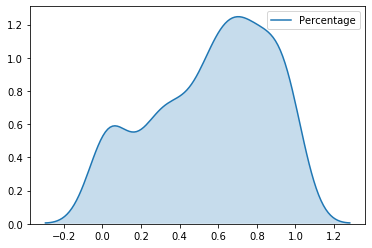

In [8]:
sns.kdeplot(df.Percentage, shade = True);

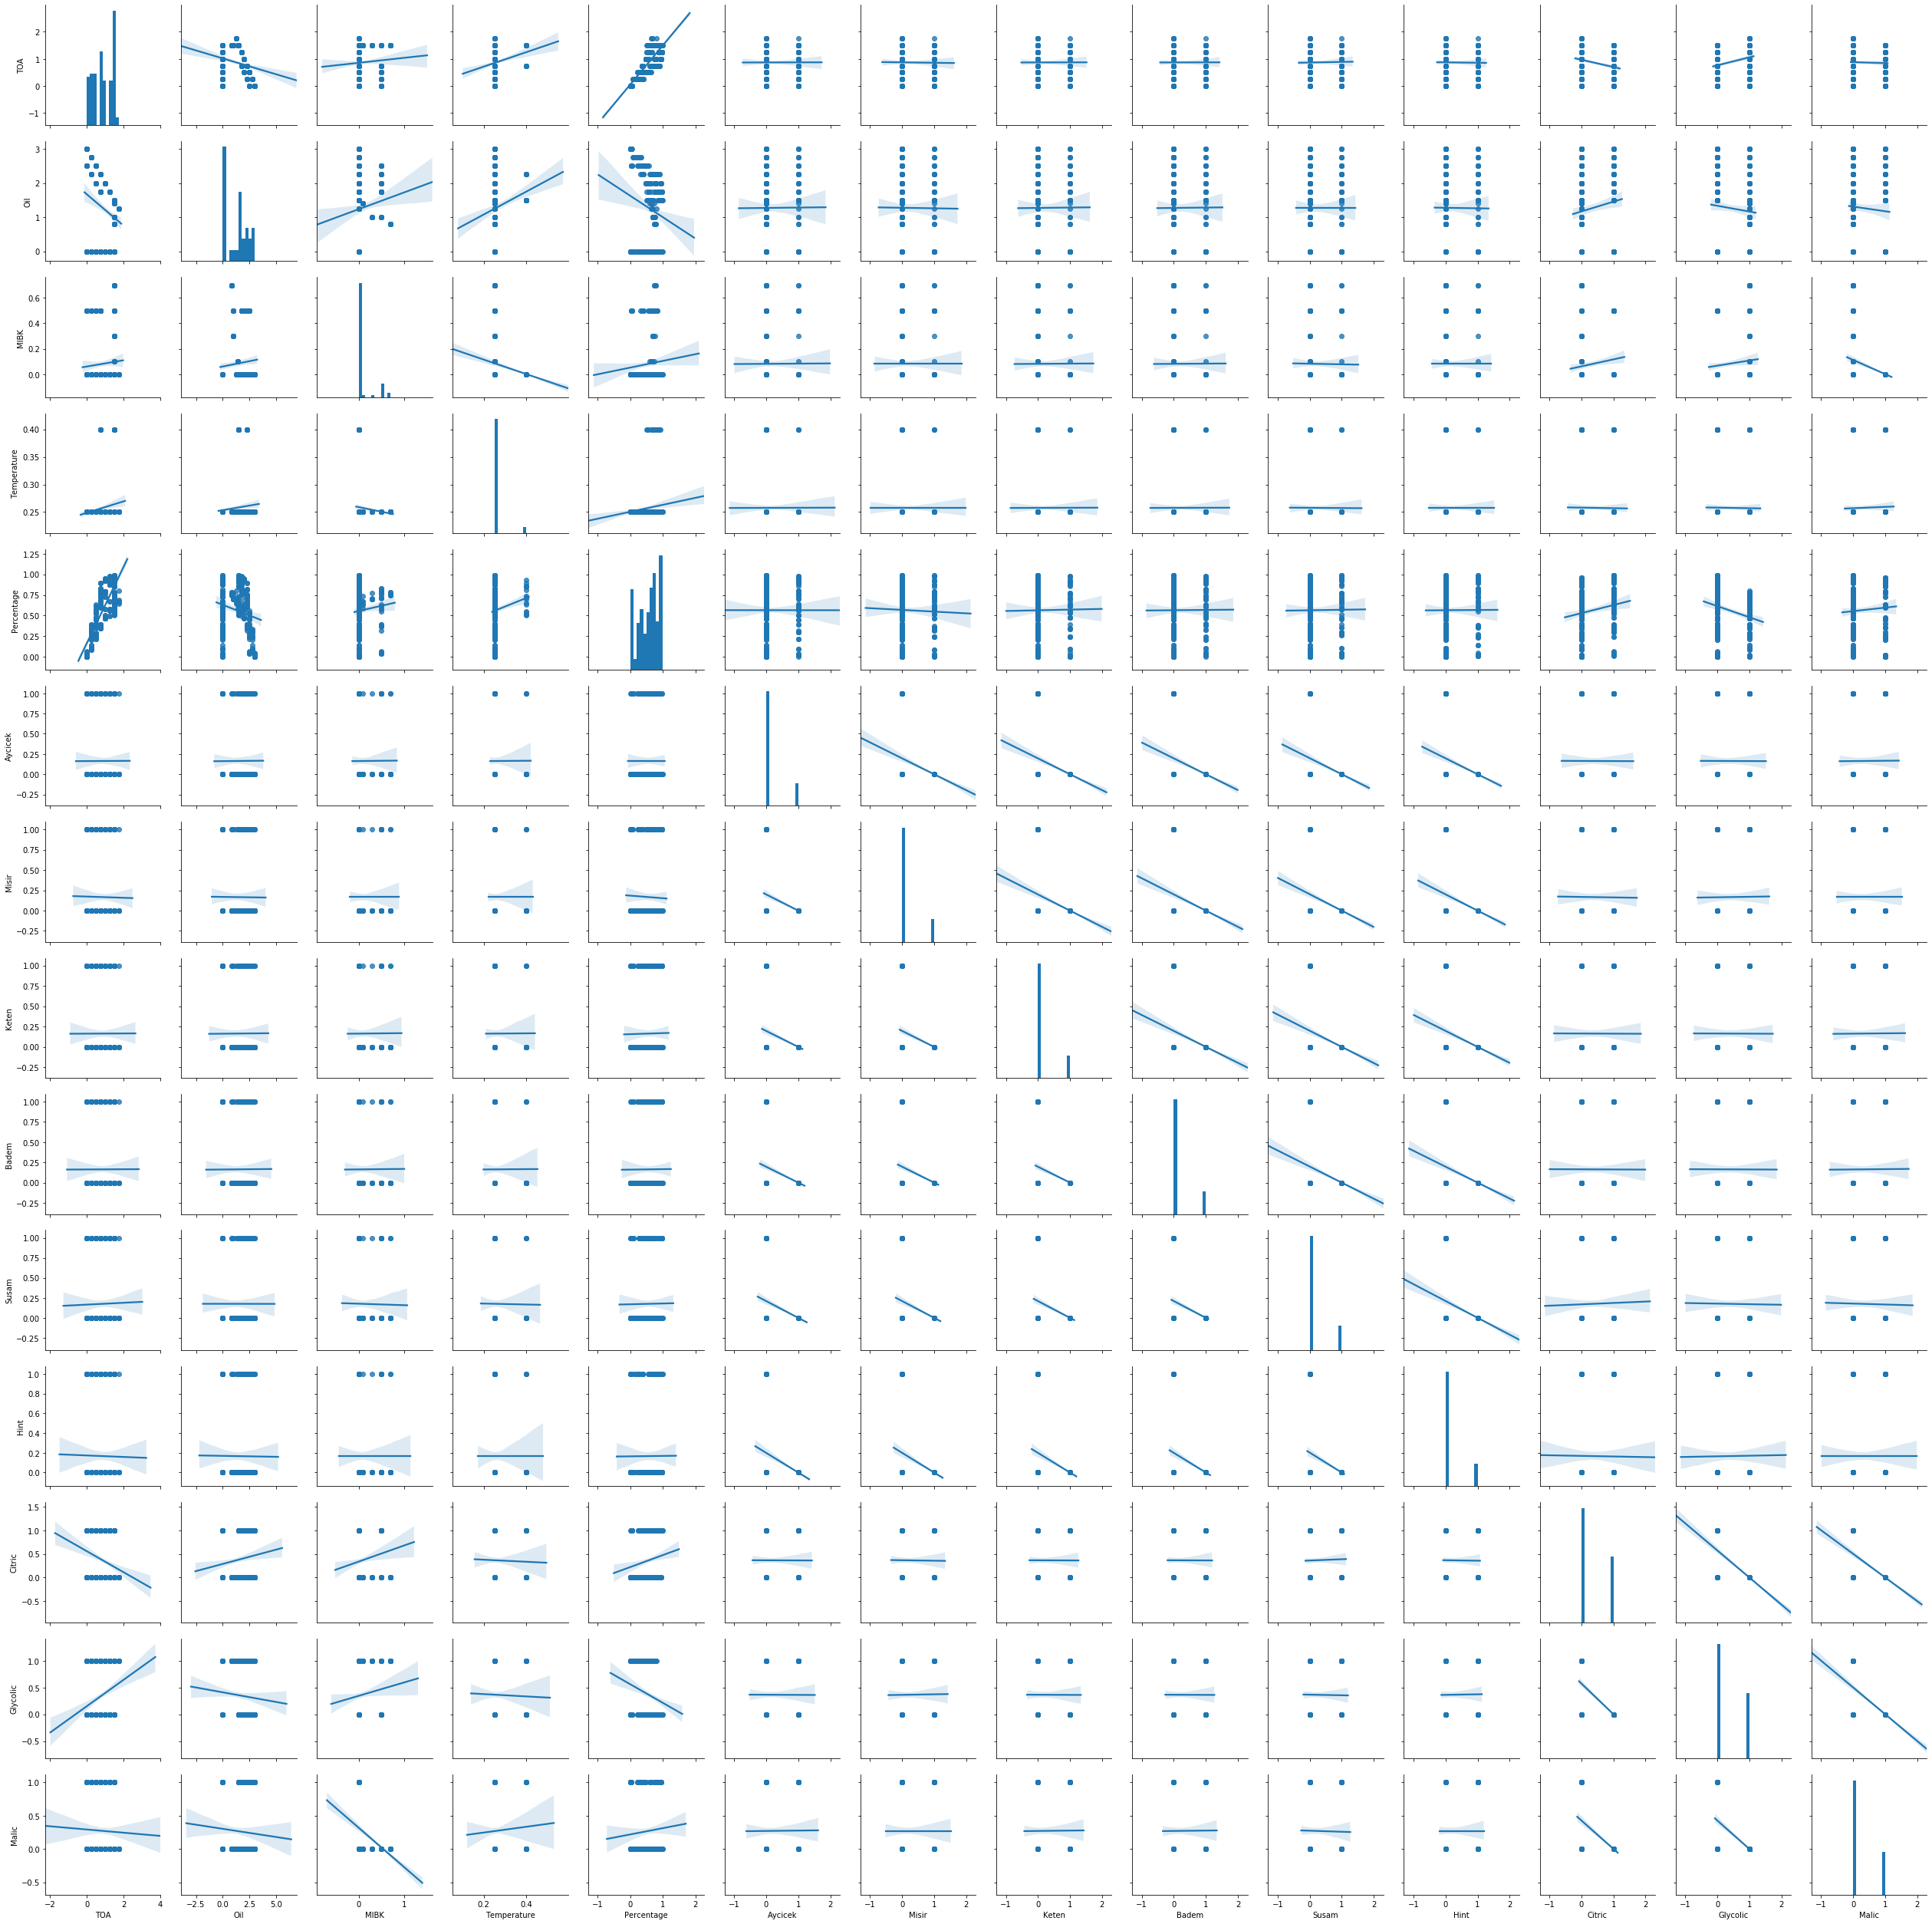

In [9]:
sns.pairplot(df, kind = "reg");

In [10]:
df.corr()

,TOA,Oil,MIBK,Temperature,Percentage,Aycicek,Misir,Keten,Badem,Susam,Hint,Citric,Glycolic,Malic
TOA,1.000000,-0.231398,6.724853e-02,1.663710e-01,0.815709,0.001707,-1.071531e-02,0.001707,0.001707,0.016027,-1.071531e-02,-0.244007,0.270447,-2.862214e-02
Oil,-0.231398,1.000000,9.100843e-02,1.058185e-01,-0.179217,0.003798,-5.428161e-03,0.003798,0.003798,-0.000451,-5.428161e-03,0.131802,-0.078369,-5.784337e-02
MIBK,0.067249,0.091008,1.000000e+00,-9.774852e-02,0.081872,0.003223,3.801919e-17,0.003223,0.003223,-0.009416,-2.075015e-17,0.137269,0.100705,-2.576139e-01
Temperature,0.166371,0.105818,-9.774852e-02,1.000000e+00,0.114871,0.001766,-3.271999e-17,0.001766,0.001766,-0.005161,3.830633e-17,-0.014944,-0.014944,3.235518e-02
Percentage,0.815709,-0.179217,8.187192e-02,1.148705e-01,1.000000,-0.000356,-2.583688e-02,0.010324,0.004515,0.007822,3.476382e-03,0.157687,-0.216327,6.348000e-02
Aycicek,0.001707,0.003798,3.223174e-03,1.766472e-03,-0.000356,1.000000,-1.979626e-01,-0.195946,-0.195946,-0.203973,-1.979626e-01,-0.002150,-0.002150,4.655496e-03
Misir,-0.010715,-0.005428,3.801919e-17,-3.271999e-17,-0.025837,-0.197963,1.000000e+00,-0.197963,-0.197963,-0.206072,-2.000000e-01,-0.007875,0.007875,-2.342482e-17
Keten,0.001707,0.003798,3.223174e-03,1.766472e-03,0.010324,-0.195946,-1.979626e-01,1.000000,-0.195946,-0.203973,-1.979626e-01,-0.002150,-0.002150,4.655496e-03
Badem,0.001707,0.003798,3.223174e-03,1.766472e-03,0.004515,-0.195946,-1.979626e-01,-0.195946,1.000000,-0.203973,-1.979626e-01,-0.002150,-0.002150,4.655496e-03
Susam,0.016027,-0.000451,-9.416241e-03,-5.160605e-03,0.007822,-0.203973,-2.060722e-01,-0.203973,-0.203973,1.000000,-2.060722e-01,0.021725,-0.009161,-1.360065e-02


## Oversampling

In [11]:
df1 = df.iloc[:177, :]
df2 = df.iloc[177:, :]

In [12]:
df.shape

(354, 14)

In [13]:
df1.shape

(177, 14)

In [14]:
df2.shape

(177, 14)

In [15]:
from sklearn.utils import resample

In [16]:
n_iterations = 5
n_size = int(len(df1))*(6)

medians = list()
for i in range(n_iterations):
    r1 = resample(df1, n_samples = n_size)
r1.tail()
r1

,TOA,Oil,MIBK,Temperature,Percentage,Aycicek,Misir,Keten,Badem,Susam,Hint,Citric,Glycolic,Malic
25,0.50,2.50,0.0,0.25,0.5214,0,1,0,0,0,0,1,0,0
161,0.75,2.25,0.0,0.25,0.6168,0,0,0,0,0,1,0,0,1
110,0.00,3.00,0.0,0.25,0.0060,0,0,1,0,0,0,0,1,0
35,0.25,2.75,0.0,0.25,0.2429,0,0,0,0,0,1,1,0,0
110,0.00,3.00,0.0,0.25,0.0060,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,0.75,1.75,0.5,0.25,0.7839,0,1,0,0,0,0,1,0,0
54,0.25,2.25,0.5,0.25,0.3207,1,0,0,0,0,0,1,0,0
119,1.50,0.80,0.7,0.25,0.7818,0,0,0,0,0,1,0,1,0
62,0.00,2.50,0.5,0.25,0.0564,0,0,1,0,0,0,1,0,0


In [17]:
new_df1 = pd.concat([df1, r1],axis=0)
new_df1

,TOA,Oil,MIBK,Temperature,Percentage,Aycicek,Misir,Keten,Badem,Susam,Hint,Citric,Glycolic,Malic
0,1.50,1.50,0.0,0.25,0.9760,1,0,0,0,0,0,1,0,0
1,1.50,1.50,0.0,0.25,0.9830,0,1,0,0,0,0,1,0,0
2,1.50,1.50,0.0,0.25,0.9808,0,0,1,0,0,0,1,0,0
3,1.50,1.50,0.0,0.25,0.9791,0,0,0,1,0,0,1,0,0
4,1.50,1.50,0.0,0.25,0.9830,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,0.75,1.75,0.5,0.25,0.7839,0,1,0,0,0,0,1,0,0
54,0.25,2.25,0.5,0.25,0.3207,1,0,0,0,0,0,1,0,0
119,1.50,0.80,0.7,0.25,0.7818,0,0,0,0,0,1,0,1,0
62,0.00,2.50,0.5,0.25,0.0564,0,0,1,0,0,0,1,0,0


In [18]:
n_iterations = 5
n_size = int(len(df2))*(14)

medians = list()
for i in range(n_iterations):
    r2 = resample(df2, n_samples = n_size)
r2.tail()
r2

,TOA,Oil,MIBK,Temperature,Percentage,Aycicek,Misir,Keten,Badem,Susam,Hint,Citric,Glycolic,Malic
270,0.50,0.00,0.0,0.25,0.2478,0,0,0,1,0,0,0,1,0
252,0.75,0.00,0.0,0.25,0.3896,0,0,0,1,0,0,0,1,0
289,0.25,0.00,0.0,0.25,0.1029,0,0,0,0,1,0,0,1,0
306,0.75,1.75,0.5,0.25,0.8050,1,0,0,0,0,0,1,0,0
252,0.75,0.00,0.0,0.25,0.3896,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,1.50,1.50,0.0,0.40,0.5159,0,0,0,0,1,0,0,1,0
259,0.50,0.00,0.0,0.25,0.4771,0,0,0,0,1,0,1,0,0
249,0.75,0.00,0.0,0.25,0.3938,1,0,0,0,0,0,0,1,0
183,1.50,0.00,0.0,0.25,0.9760,1,0,0,0,0,0,1,0,0


In [19]:
new_df2 = pd.concat([df2, r2],axis=0)
new_df2

,TOA,Oil,MIBK,Temperature,Percentage,Aycicek,Misir,Keten,Badem,Susam,Hint,Citric,Glycolic,Malic
177,0.00,3.0,0.0,0.25,0.0219,0,0,0,1,0,0,0,0,1
178,0.00,3.0,0.0,0.25,0.0014,0,0,0,0,1,0,0,0,1
179,0.00,3.0,0.0,0.25,0.0085,0,0,0,0,0,1,0,0,1
180,1.50,1.5,0.0,0.25,0.9648,0,0,0,0,1,0,1,0,0
181,1.50,1.5,0.0,0.25,0.9589,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,1.50,1.5,0.0,0.40,0.5159,0,0,0,0,1,0,0,1,0
259,0.50,0.0,0.0,0.25,0.4771,0,0,0,0,1,0,1,0,0
249,0.75,0.0,0.0,0.25,0.3938,1,0,0,0,0,0,0,1,0
183,1.50,0.0,0.0,0.25,0.9760,1,0,0,0,0,0,1,0,0


In [20]:
bootstrap = pd.concat([new_df1, new_df2])

In [21]:
bootstrap

,TOA,Oil,MIBK,Temperature,Percentage,Aycicek,Misir,Keten,Badem,Susam,Hint,Citric,Glycolic,Malic
0,1.50,1.5,0.0,0.25,0.9760,1,0,0,0,0,0,1,0,0
1,1.50,1.5,0.0,0.25,0.9830,0,1,0,0,0,0,1,0,0
2,1.50,1.5,0.0,0.25,0.9808,0,0,1,0,0,0,1,0,0
3,1.50,1.5,0.0,0.25,0.9791,0,0,0,1,0,0,1,0,0
4,1.50,1.5,0.0,0.25,0.9830,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,1.50,1.5,0.0,0.40,0.5159,0,0,0,0,1,0,0,1,0
259,0.50,0.0,0.0,0.25,0.4771,0,0,0,0,1,0,1,0,0
249,0.75,0.0,0.0,0.25,0.3938,1,0,0,0,0,0,0,1,0
183,1.50,0.0,0.0,0.25,0.9760,1,0,0,0,0,0,1,0,0


In [22]:
bootstrap.shape

(3894, 14)

## Model Building

In [23]:
Xboot = bootstrap.drop("Percentage", axis = 1)
yboot = bootstrap["Percentage"]

In [24]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [25]:
X_trainB, X_testB, y_trainB, y_testB = train_test_split(Xboot, yboot, test_size = 0.20, random_state= 42)

In [26]:
print(X_trainB.shape, X_testB.shape, y_trainB.shape, X_testB.shape)

(3115, 13) (779, 13) (3115,) (779, 13)


In [27]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
modelBoot = lm.fit(X_trainB, y_trainB)

In [28]:
modelBoot.intercept_

0.21666469974303876

In [29]:
modelBoot.coef_

array([ 0.54311548, -0.00568708,  0.0623227 , -0.45106093,  0.00302832,
       -0.01077971,  0.00347664,  0.00329478, -0.01082286,  0.01180283,
        0.15998772, -0.19620033,  0.03621261])

### Model Evaluation

In [30]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
rmse = np.sqrt(mean_squared_error(y_trainB, modelBoot.predict(X_trainB)))
rmse

0.09490939931535902

In [32]:
rmse = np.sqrt(mean_squared_error(y_testB, modelBoot.predict(X_testB)))
rmse

0.0925742451746842

In [33]:
modelBoot.score(X_trainB, y_trainB)

0.9005181563239282

### Cross Validation

In [34]:
cross_val_score(modelBoot, X_trainB, y_trainB, cv = 10, scoring = "r2").mean()

0.8993660622297639

In [35]:
np.sqrt(-cross_val_score(modelBoot, 
                X_trainB, 
                y_trainB, 
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean()

0.09526970267609616

In [36]:
np.sqrt(-cross_val_score(modelBoot, 
                X_testB, 
                y_testB, 
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean()

0.0929113014848849

### Export the Model

In [37]:
 import pickle
 pickle.dump(modelBoot, open("MLR_sampling2_CV.pkl","wb"))